In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as fn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Loading the MNIST dataset
train_dataset = MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class ClassificationANN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, output_dim):
        super(ClassificationANN, self).__init__()

        self.weights1 = nn.Parameter(torch.randn(input_dim, hidden_dim1) * 0.01)
        self.bias1 = nn.Parameter(torch.zeros(hidden_dim1))
        self.weights2 = nn.Parameter(torch.randn(hidden_dim1, hidden_dim2) * 0.01)
        self.bias2 = nn.Parameter(torch.zeros(hidden_dim2))
        self.weights3 = nn.Parameter(torch.randn(hidden_dim2, hidden_dim3) * 0.01)
        self.bias3 = nn.Parameter(torch.zeros(hidden_dim3))
        self.weights4 = nn.Parameter(torch.randn(hidden_dim3, hidden_dim4) * 0.01)
        self.bias4 = nn.Parameter(torch.zeros(hidden_dim4))
        self.weights5 = nn.Parameter(torch.randn(hidden_dim4, hidden_dim5) * 0.01)
        self.bias5 = nn.Parameter(torch.zeros(hidden_dim5))
        self.weights_out = nn.Parameter(torch.randn(hidden_dim5, output_dim) * 0.01)
        self.bias_out = nn.Parameter(torch.zeros(output_dim))
        self._initialize_weights()

    def forward(self, input):
        input = input.view(input.size(0), -1)
        output1 = fn.relu(torch.matmul(input, self.weights1) + self.bias1)
        output2 = fn.relu(torch.matmul(output1, self.weights2) + self.bias2)
        output3 = fn.relu(torch.matmul(output2, self.weights3) + self.bias3)
        output4 = fn.relu(torch.matmul(output3, self.weights4) + self.bias4)
        output5 = fn.relu(torch.matmul(output4, self.weights5) + self.bias5)
        final_output = torch.matmul(output5, self.weights_out) + self.bias_out

        return final_output

    def _initialize_weights(self):
        for weight in self.parameters():
            if len(weight.shape) > 1:
                nn.init.xavier_uniform_(weight)

# Train the model
def train_model(model, train_loader, n_epochs, loss_fn, optimizer):
    for epoch in range(n_epochs):
        model.train()
        epoch_loss = 0

        for images, labels in train_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {avg_loss:.4f}")

# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.tolist())
            all_labels.extend(labels.tolist())

    # Compute metrics
    acc = accuracy_score(all_labels, all_predictions)
    cm = confusion_matrix(all_labels, all_predictions)
    report = classification_report(all_labels, all_predictions, target_names=[str(i) for i in range(10)])

    print(f"Accuracy: {acc * 100:.2f}%")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)
    return acc, cm, report

input_dim = 28 * 28
hidden_dim1 = 200
hidden_dim2 = 170
hidden_dim3 = 140
hidden_dim4 = 90
hidden_dim5 = 50
output_dim = 10

model = ClassificationANN(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, output_dim)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
n_epochs = 10
train_model(model, train_loader, n_epochs, loss_fn, optimizer)

# Evaluate the model
evaluate_model(model, test_loader)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.69MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10, Loss: 0.7276
Epoch 2/10, Loss: 0.2850
Epoch 3/10, Loss: 0.2228
Epoch 4/10, Loss: 0.1831
Epoch 5/10, Loss: 0.1574
Epoch 6/10, Loss: 0.1369
Epoch 7/10, Loss: 0.1224
Epoch 8/10, Loss: 0.1086
Epoch 9/10, Loss: 0.0986
Epoch 10/10, Loss: 0.0899
Accuracy: 96.01%

Confusion Matrix:
[[ 967    0    1    1    0    5    0    3    2    1]
 [   0 1119    2    1    0    0    1    8    4    0]
 [   3    5  996    5    2    0    1   19    1    0]
 [   0    0    8  974    0    4    0   14    7    3]
 [   3    1    8    0  909    1    3   19    3   35]
 [   5    1    1   14    0  849    7    5    8    2]
 [  10    3    8    1    2   11  914    3    6    0]
 [   0    4    6    1    1    0    0 1015    0    1]
 [   2    0    6    9    1    3    3   17  931    2]
 [   5    2    2   11    5    3    1   49    4  927]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97     

(0.9601,
 array([[ 967,    0,    1,    1,    0,    5,    0,    3,    2,    1],
        [   0, 1119,    2,    1,    0,    0,    1,    8,    4,    0],
        [   3,    5,  996,    5,    2,    0,    1,   19,    1,    0],
        [   0,    0,    8,  974,    0,    4,    0,   14,    7,    3],
        [   3,    1,    8,    0,  909,    1,    3,   19,    3,   35],
        [   5,    1,    1,   14,    0,  849,    7,    5,    8,    2],
        [  10,    3,    8,    1,    2,   11,  914,    3,    6,    0],
        [   0,    4,    6,    1,    1,    0,    0, 1015,    0,    1],
        [   2,    0,    6,    9,    1,    3,    3,   17,  931,    2],
        [   5,    2,    2,   11,    5,    3,    1,   49,    4,  927]]),
 '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98       980\n           1       0.99      0.99      0.99      1135\n           2       0.96      0.97      0.96      1032\n           3       0.96      0.96      0.96      1010\n          

Epoch 1/10, Train Loss: 0.0636, Train Accuracy: 98.07%, Test Accuracy: 96.95%
Epoch 2/10, Train Loss: 0.0587, Train Accuracy: 98.19%, Test Accuracy: 96.98%
Epoch 3/10, Train Loss: 0.0545, Train Accuracy: 98.33%, Test Accuracy: 97.24%
Epoch 4/10, Train Loss: 0.0496, Train Accuracy: 98.51%, Test Accuracy: 97.44%
Epoch 5/10, Train Loss: 0.0470, Train Accuracy: 98.59%, Test Accuracy: 96.15%
Epoch 6/10, Train Loss: 0.0438, Train Accuracy: 98.61%, Test Accuracy: 97.55%
Epoch 7/10, Train Loss: 0.0391, Train Accuracy: 98.83%, Test Accuracy: 97.08%
Epoch 8/10, Train Loss: 0.0371, Train Accuracy: 98.90%, Test Accuracy: 96.21%
Epoch 9/10, Train Loss: 0.0338, Train Accuracy: 98.98%, Test Accuracy: 96.73%
Epoch 10/10, Train Loss: 0.0317, Train Accuracy: 99.05%, Test Accuracy: 97.14%


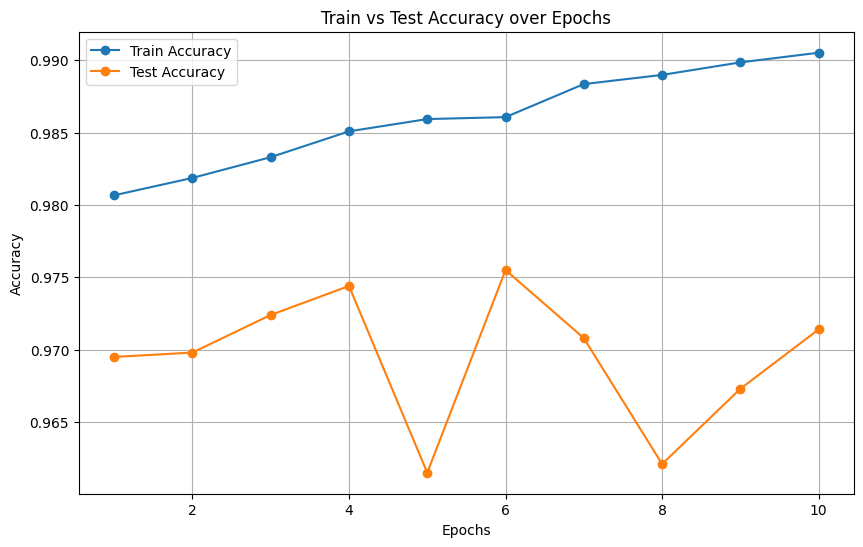

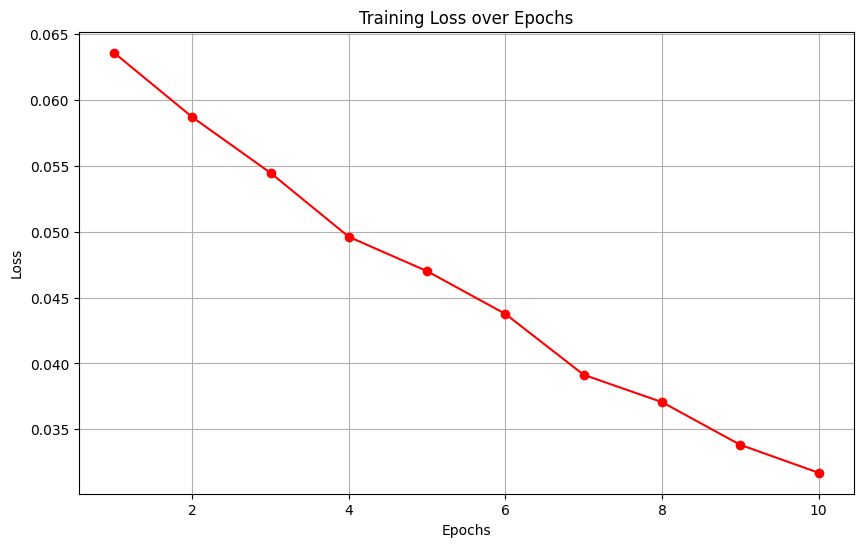

Accuracy: 97.14%

Confusion Matrix:
[[ 971    0    0    2    0    4    0    1    1    1]
 [   0 1124    2    3    0    0    2    0    4    0]
 [   4    4 1008   11    1    0    1    3    0    0]
 [   0    0    1 1000    0    2    0    2    3    2]
 [   3    4    8    1  939    3    5    4    1   14]
 [   3    0    0   13    1  865    7    0    3    0]
 [   6    3    0    0    2    5  939    0    3    0]
 [   1    9    9    7    0    1    1  994    1    5]
 [   4    0    6   27    0    5    8    3  919    2]
 [   4    4    0   19    5    7    2    9    4  955]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.98      0.98      1032
           3       0.92      0.99      0.96      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0

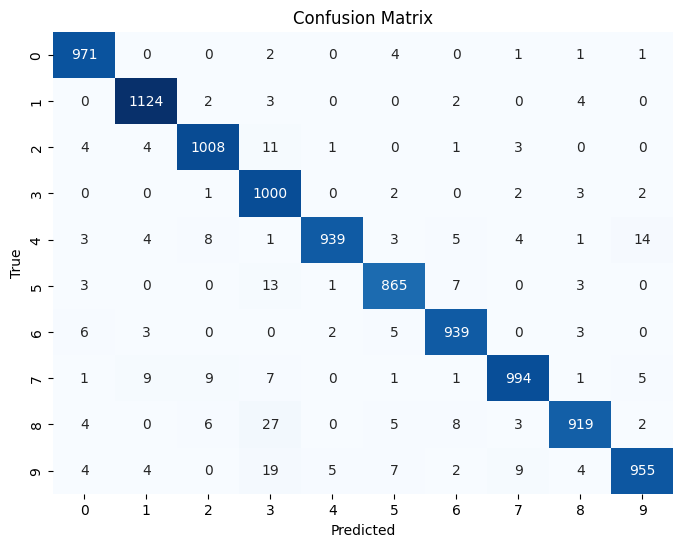

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot accuracy over epochs
def plot_accuracy(train_accuracies, test_accuracies):
    epochs = np.arange(1, len(train_accuracies) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
    plt.title('Train vs Test Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot loss over epochs
def plot_loss(train_losses):
    epochs = np.arange(1, len(train_losses) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o', color='red')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Train and collect accuracy, loss data
train_accuracies = []
test_accuracies = []
train_losses = []

def train_model_with_metrics(model, train_loader, n_epochs, loss_fn, optimizer):
    for epoch in range(n_epochs):
        model.train()
        epoch_loss = 0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            _, predictions = torch.max(outputs, 1)
            correct_train += (predictions == labels).sum().item()
            total_train += labels.size(0)

        avg_loss = epoch_loss / len(train_loader)
        avg_train_acc = correct_train / total_train

        train_losses.append(avg_loss)
        train_accuracies.append(avg_train_acc)

        # Evaluate on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predictions = torch.max(outputs, 1)
                correct_test += (predictions == labels).sum().item()
                total_test += labels.size(0)

        avg_test_acc = correct_test / total_test
        test_accuracies.append(avg_test_acc)

        print(f"Epoch {epoch + 1}/{n_epochs}, Train Loss: {avg_loss:.4f}, Train Accuracy: {avg_train_acc * 100:.2f}%, Test Accuracy: {avg_test_acc * 100:.2f}%")

# Now train with metrics and plot the results
train_model_with_metrics(model, train_loader, n_epochs, loss_fn, optimizer)

# Plot accuracy and loss
plot_accuracy(train_accuracies, test_accuracies)
plot_loss(train_losses)

# Evaluate final model performance
acc, cm, report = evaluate_model(model, test_loader)

# Plot confusion matrix
plot_confusion_matrix(cm)
